# Imports

In [1]:
#Import Data Exploration Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Data Gathering

In [2]:
file = "../Data/Capstone_Data.csv"

In [3]:
oil_df = pd.read_csv(file)

In [4]:
oil_df.head()

,Year,Quarter,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs
0,2019,Q3,2.57,15.44,3.43,20.88,14.37,5.58,13.74,26.24,102.25,5.47,1.93,2.96,4.64,19.45,4.89,14.58,15.33,33.88,100.17,28.65,5.24,33.88,61.95,195,190,114,422,224,1144,132,920
1,2019,Q2,2.32,14.95,3.39,20.63,14.65,5.19,14.11,25.77,101.00,5.47,1.91,2.96,4.59,19.35,4.92,14.43,14.88,34.91,100.49,29.48,5.44,34.91,69.04,186,159,122,412,230,1109,83,989
2,2019,Q1,2.31,14.82,4.06,20.55,14.46,5.15,13.95,25.22,100.49,5.43,1.91,2.96,4.85,18.86,4.89,14.86,14.12,35.39,100.34,29.95,5.44,35.39,63.10,188,92,116,398,235,1030,186,1046
3,2018,Q4,2.58,14.93,3.89,20.75,14.10,5.36,13.82,25.29,100.73,5.62,1.95,2.95,4.89,19.03,4.81,14.88,14.49,36.74,102.42,31.42,5.32,36.74,68.76,193,90,106,397,225,1011,177,1072
4,2018,Q3,2.65,15.47,3.53,20.86,13.88,5.50,13.48,25.88,101.25,5.41,2.09,2.84,4.65,18.44,4.73,14.63,14.81,36.81,101.57,31.50,5.32,36.81,75.07,191,84,104,399,225,1003,208,1051


# Explore Data Set

In [5]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    103 non-null    int64  
 1   Quarter                 103 non-null    object 
 2   Canada_D                103 non-null    float64
 3   Europe_D                103 non-null    float64
 4   Japan_D                 103 non-null    float64
 5   US_D                    103 non-null    float64
 6   China_D                 103 non-null    float64
 7   Soviet_D                103 non-null    float64
 8   Asia_D                  103 non-null    float64
 9   Other_D                 103 non-null    float64
 10  Total_World_D           103 non-null    float64
 11  Canada_S                103 non-null    float64
 12  Mexico_S                103 non-null    float64
 13  North_Sea_S             103 non-null    float64
 14  Other_S                 103 non-null    fl

In [6]:
oil_df.describe()

,Year,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2006.378641,2.209515,15.511359,4.922330,19.708738,7.89000,4.320485,9.361650,20.525728,84.446990,3.472913,3.136505,4.648738,2.436214,10.820583,3.986214,11.256214,11.658155,33.821650,84.453495,29.471748,4.350971,33.821650,53.548835,293.019417,99.737864,75.271845,259.854369,207.737864,935.737864,306.669903,1190.038835
std,7.470355,0.221613,0.759512,0.777944,0.918108,3.57459,0.482691,2.472779,3.671843,9.478345,0.883869,0.512389,1.361103,1.390549,3.050705,0.679246,2.783294,1.918736,2.817496,9.402470,1.750876,1.272196,2.817496,33.082288,79.903003,22.631733,24.813498,98.253514,37.689381,201.976166,138.513989,448.980303
min,1994.000000,1.700000,13.750000,3.390000,17.780000,3.03000,3.390000,5.310000,14.620000,67.170000,2.270000,1.910000,2.710000,1.430000,7.740000,2.930000,7.010000,8.030000,28.150000,68.070000,25.700000,1.810000,28.150000,11.210000,180.000000,61.000000,37.000000,112.000000,129.000000,565.000000,49.000000,421.000000
25%,2000.000000,2.040000,14.930000,4.325000,19.005000,4.72000,3.950000,7.320000,17.380000,76.790000,2.750000,2.915000,3.170000,1.565000,8.845000,3.380000,8.140000,10.090000,31.330000,76.540000,28.035000,3.255000,31.330000,24.545000,222.500000,82.500000,57.000000,168.500000,178.500000,763.000000,189.500000,832.000000
50%,2006.000000,2.250000,15.580000,4.960000,19.650000,7.28000,4.230000,9.000000,20.100000,84.720000,3.290000,3.180000,4.720000,1.650000,9.390000,3.880000,12.450000,12.120000,34.510000,84.430000,29.860000,4.230000,34.510000,49.550000,280.000000,94.000000,68.000000,250.000000,211.000000,936.000000,291.000000,1046.000000
75%,2013.000000,2.385000,16.150000,5.435000,20.360000,10.86000,4.695000,11.535000,24.530000,91.635000,4.010000,3.550000,6.010000,4.335000,11.910000,4.745000,13.705000,12.725000,36.450000,90.985000,30.935000,5.315000,36.450000,74.660000,356.000000,112.000000,84.500000,375.500000,241.000000,1089.000000,406.000000,1701.500000
max,2019.000000,2.650000,16.750000,6.430000,21.310000,14.65000,5.580000,14.110000,26.240000,102.250000,5.620000,3.900000,6.670000,5.090000,19.450000,5.210000,14.880000,15.330000,37.720000,102.420000,32.210000,6.560000,37.720000,121.200000,438.000000,190.000000,142.000000,422.000000,277.000000,1348.000000,665.000000,2010.000000


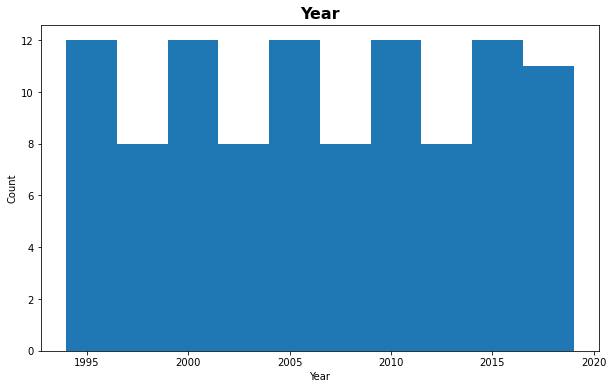

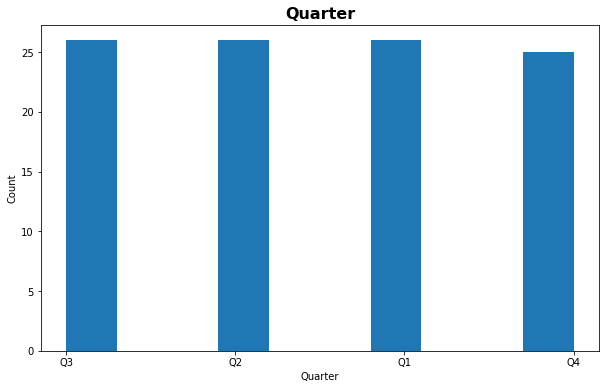

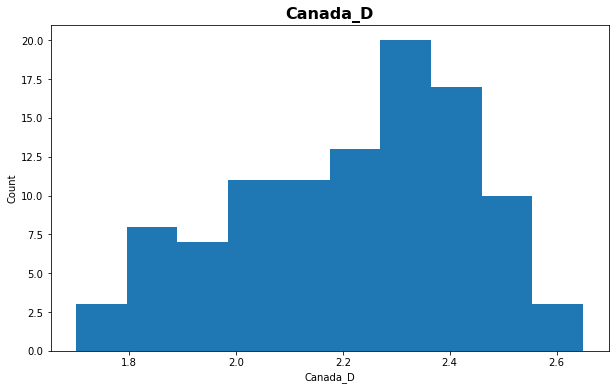

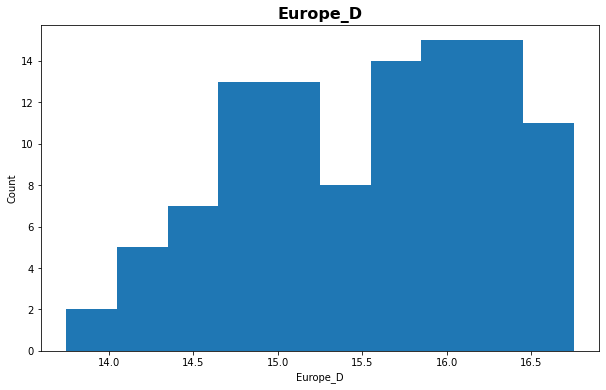

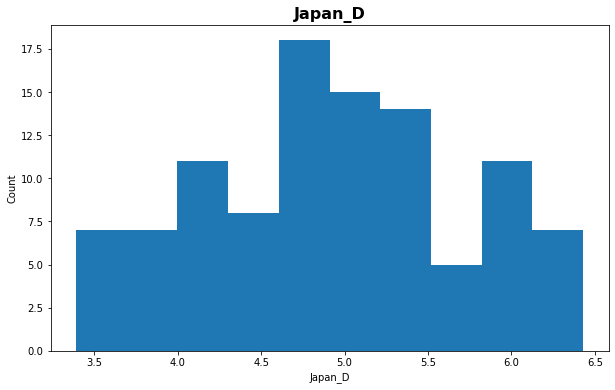

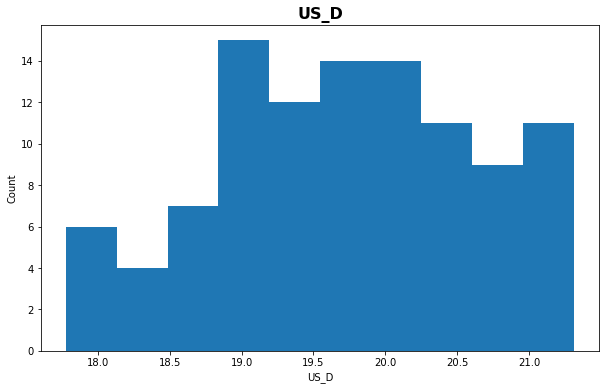

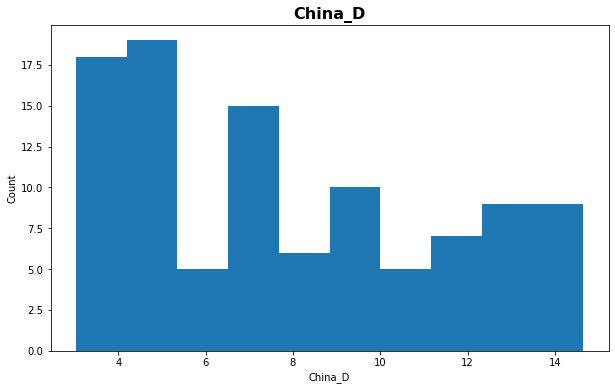

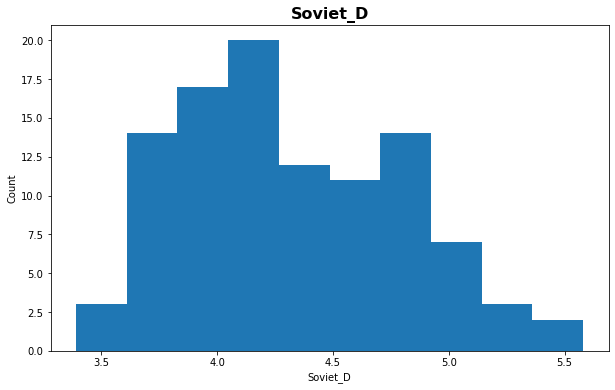

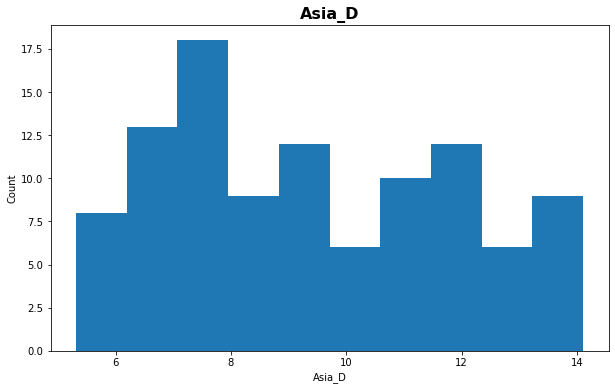

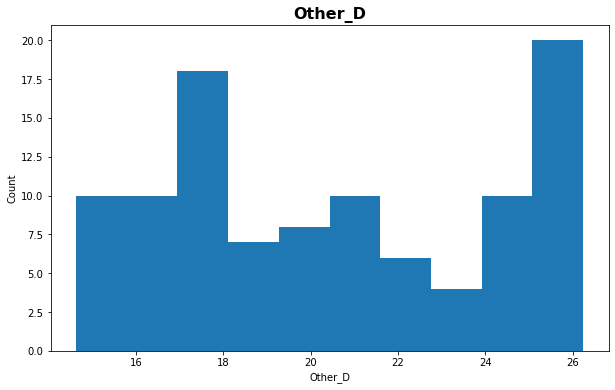

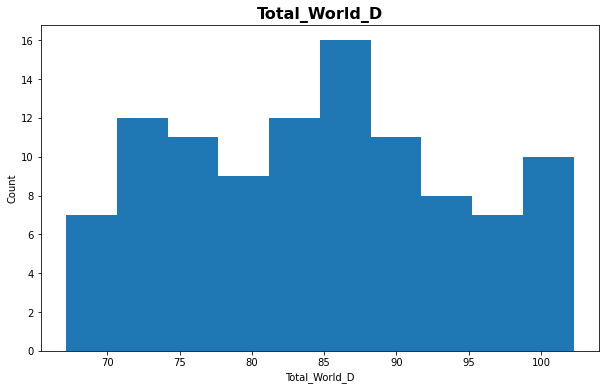

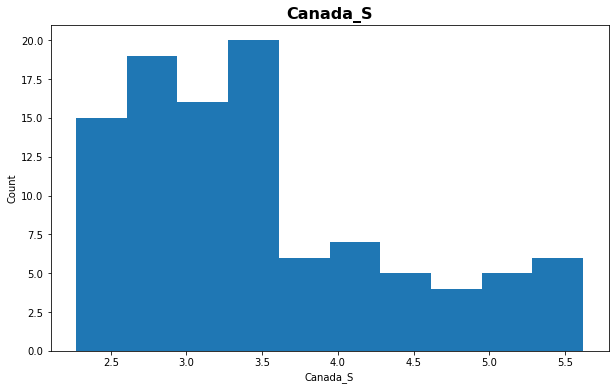

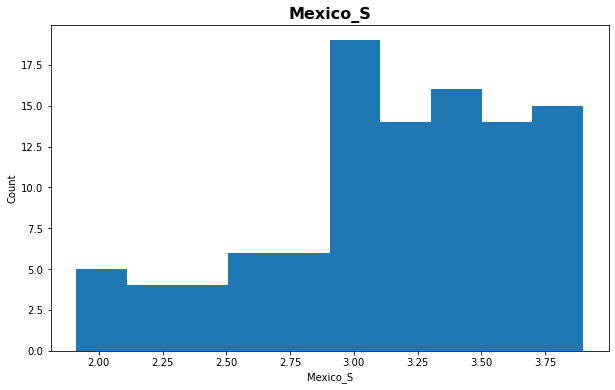

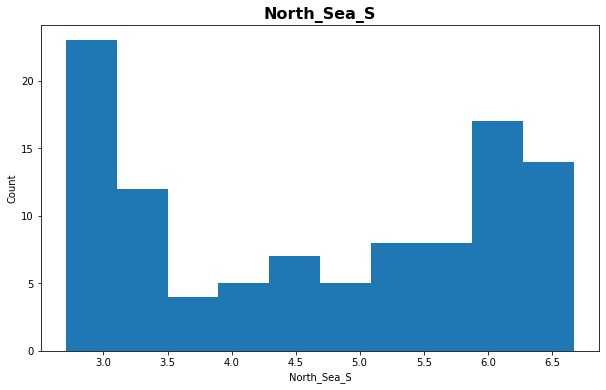

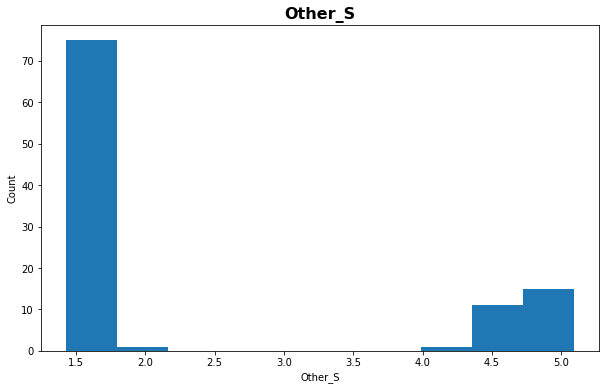

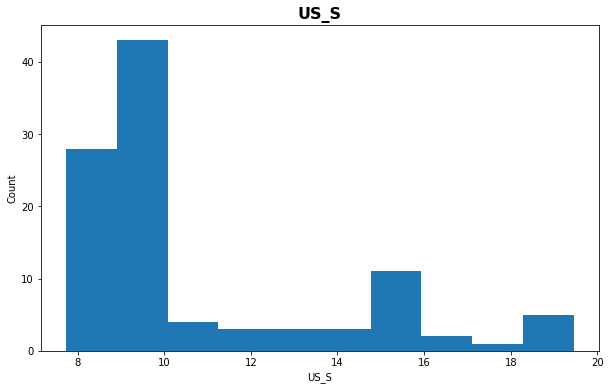

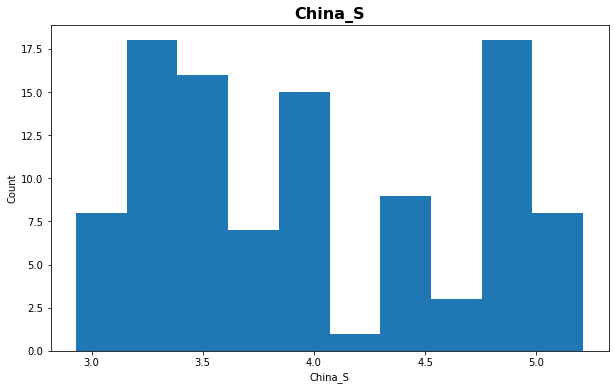

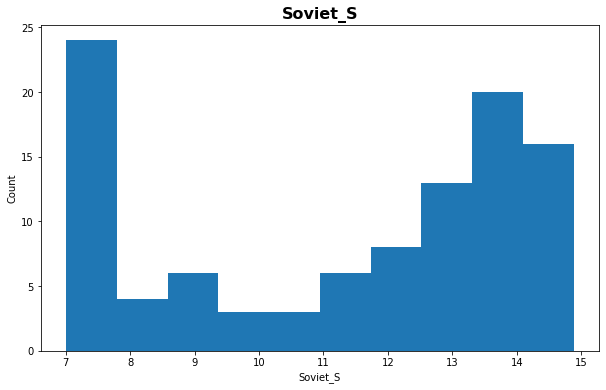

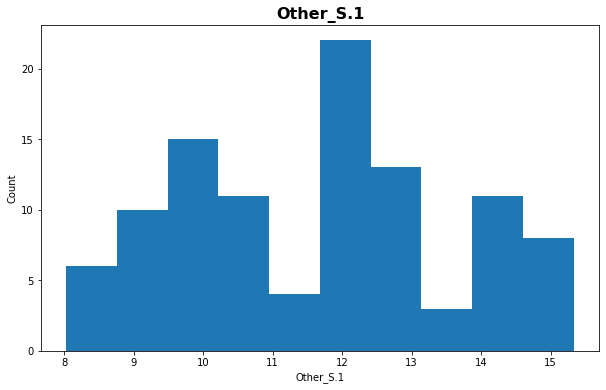

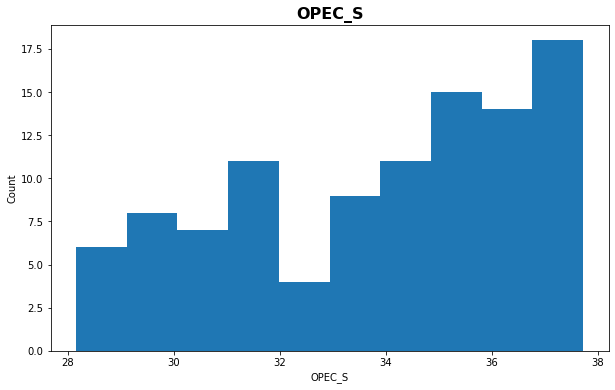

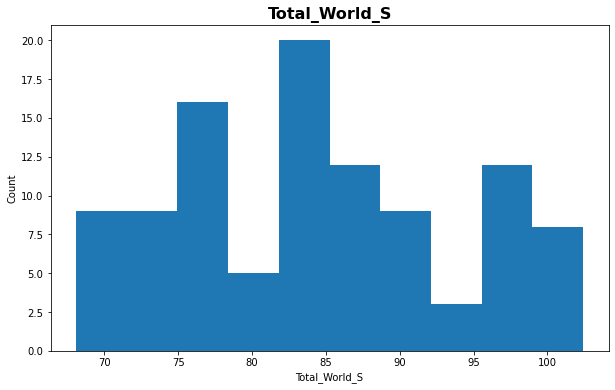

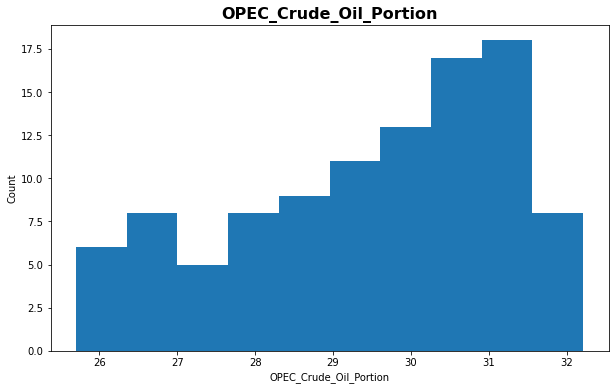

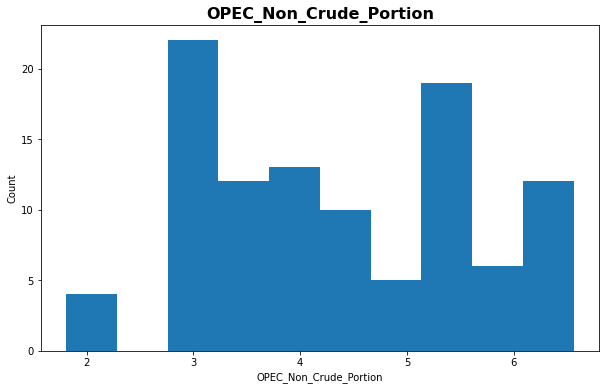

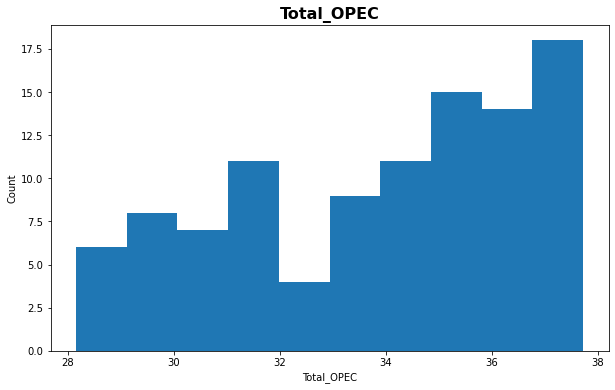

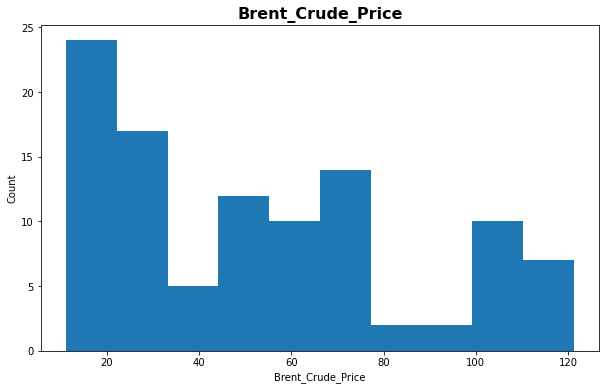

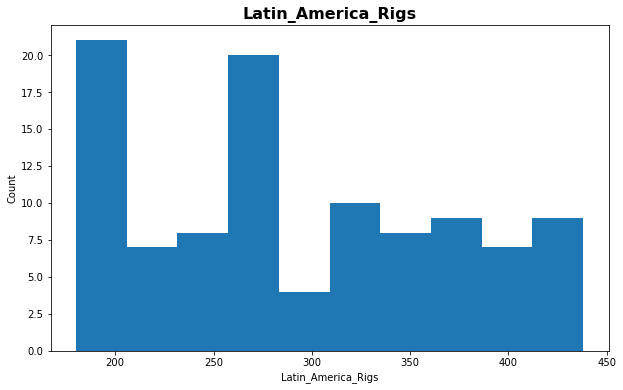

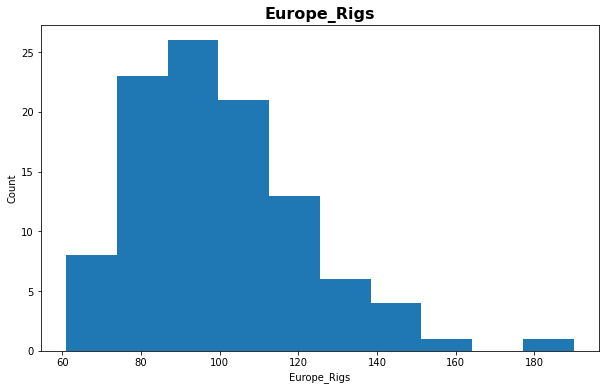

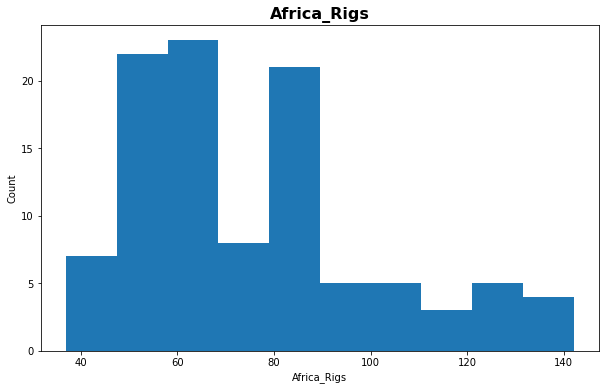

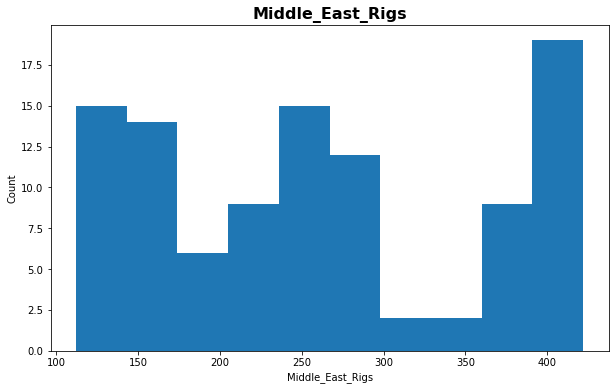

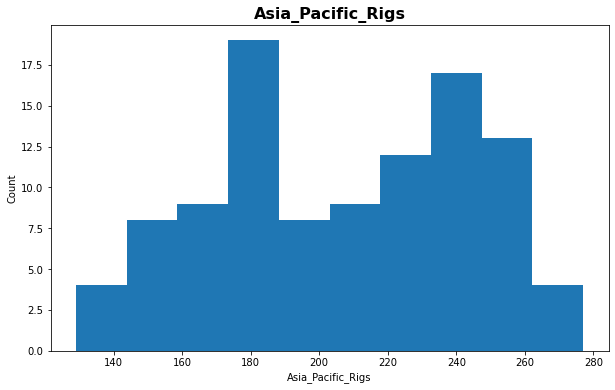

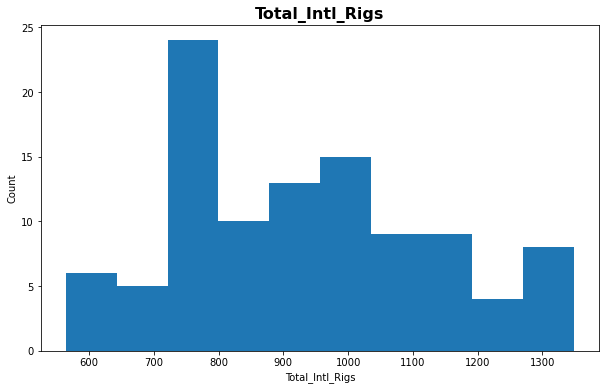

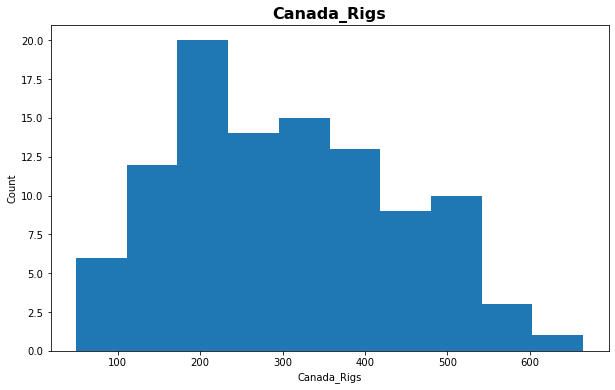

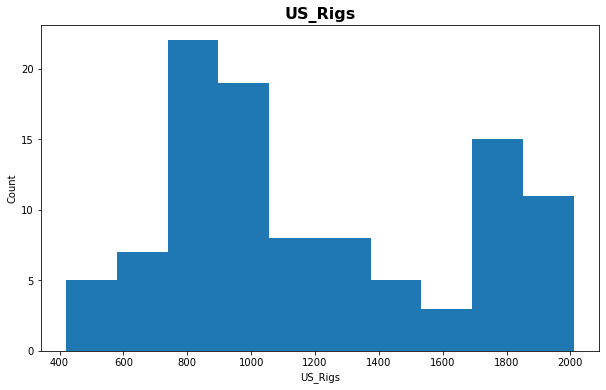

In [7]:
for col in oil_df.columns:
    plt.figure(figsize=(10,6))
    plt.hist(oil_df[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

# Data Cleaning

In [8]:
#One Hot Encoding
dummies = pd.get_dummies(oil_df.Quarter)
oil_encode_df = pd.concat([oil_df, dummies], axis='columns')
oil_encode_df.head()

,Year,Quarter,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs,Q1,Q2,Q3,Q4
0,2019,Q3,2.57,15.44,3.43,20.88,14.37,5.58,13.74,26.24,102.25,5.47,1.93,2.96,4.64,19.45,4.89,14.58,15.33,33.88,100.17,28.65,5.24,33.88,61.95,195,190,114,422,224,1144,132,920,0,0,1,0
1,2019,Q2,2.32,14.95,3.39,20.63,14.65,5.19,14.11,25.77,101.00,5.47,1.91,2.96,4.59,19.35,4.92,14.43,14.88,34.91,100.49,29.48,5.44,34.91,69.04,186,159,122,412,230,1109,83,989,0,1,0,0
2,2019,Q1,2.31,14.82,4.06,20.55,14.46,5.15,13.95,25.22,100.49,5.43,1.91,2.96,4.85,18.86,4.89,14.86,14.12,35.39,100.34,29.95,5.44,35.39,63.10,188,92,116,398,235,1030,186,1046,1,0,0,0
3,2018,Q4,2.58,14.93,3.89,20.75,14.10,5.36,13.82,25.29,100.73,5.62,1.95,2.95,4.89,19.03,4.81,14.88,14.49,36.74,102.42,31.42,5.32,36.74,68.76,193,90,106,397,225,1011,177,1072,0,0,0,1
4,2018,Q3,2.65,15.47,3.53,20.86,13.88,5.50,13.48,25.88,101.25,5.41,2.09,2.84,4.65,18.44,4.73,14.63,14.81,36.81,101.57,31.50,5.32,36.81,75.07,191,84,104,399,225,1003,208,1051,0,0,1,0


In [9]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
features = oil_encode_df.drop(["US_Rigs", "Quarter"], axis=1)
features_new = features[['Total_Intl_Rigs','Asia_Pacific_Rigs', 'Brent_Crude_Price', 'Latin_America_Rigs']]
x_scaler.fit(features_new)
features_scaled = x_scaler.transform(features_new)
df_scaled = pd.DataFrame(features_scaled, columns=features_new.columns)
df_scaled["US_Rigs"] = oil_encode_df["US_Rigs"]
df_scaled.head()

,Total_Intl_Rigs,Asia_Pacific_Rigs,Brent_Crude_Price,Latin_America_Rigs,US_Rigs
0,0.739464,0.641892,0.461315,0.058140,920
1,0.694764,0.682432,0.525775,0.023256,989
2,0.593870,0.716216,0.471770,0.031008,1046
3,0.569604,0.648649,0.523229,0.050388,1072
4,0.559387,0.648649,0.580598,0.042636,1051


# Re-Inspect Data

In [10]:
oil_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    103 non-null    int64  
 1   Quarter                 103 non-null    object 
 2   Canada_D                103 non-null    float64
 3   Europe_D                103 non-null    float64
 4   Japan_D                 103 non-null    float64
 5   US_D                    103 non-null    float64
 6   China_D                 103 non-null    float64
 7   Soviet_D                103 non-null    float64
 8   Asia_D                  103 non-null    float64
 9   Other_D                 103 non-null    float64
 10  Total_World_D           103 non-null    float64
 11  Canada_S                103 non-null    float64
 12  Mexico_S                103 non-null    float64
 13  North_Sea_S             103 non-null    float64
 14  Other_S                 103 non-null    fl

In [11]:
oil_encode_df.describe()

,Year,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs,Q1,Q2,Q3,Q4
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2006.378641,2.209515,15.511359,4.922330,19.708738,7.89000,4.320485,9.361650,20.525728,84.446990,3.472913,3.136505,4.648738,2.436214,10.820583,3.986214,11.256214,11.658155,33.821650,84.453495,29.471748,4.350971,33.821650,53.548835,293.019417,99.737864,75.271845,259.854369,207.737864,935.737864,306.669903,1190.038835,0.252427,0.252427,0.252427,0.242718
std,7.470355,0.221613,0.759512,0.777944,0.918108,3.57459,0.482691,2.472779,3.671843,9.478345,0.883869,0.512389,1.361103,1.390549,3.050705,0.679246,2.783294,1.918736,2.817496,9.402470,1.750876,1.272196,2.817496,33.082288,79.903003,22.631733,24.813498,98.253514,37.689381,201.976166,138.513989,448.980303,0.436529,0.436529,0.436529,0.430823
min,1994.000000,1.700000,13.750000,3.390000,17.780000,3.03000,3.390000,5.310000,14.620000,67.170000,2.270000,1.910000,2.710000,1.430000,7.740000,2.930000,7.010000,8.030000,28.150000,68.070000,25.700000,1.810000,28.150000,11.210000,180.000000,61.000000,37.000000,112.000000,129.000000,565.000000,49.000000,421.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,2.040000,14.930000,4.325000,19.005000,4.72000,3.950000,7.320000,17.380000,76.790000,2.750000,2.915000,3.170000,1.565000,8.845000,3.380000,8.140000,10.090000,31.330000,76.540000,28.035000,3.255000,31.330000,24.545000,222.500000,82.500000,57.000000,168.500000,178.500000,763.000000,189.500000,832.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,2.250000,15.580000,4.960000,19.650000,7.28000,4.230000,9.000000,20.100000,84.720000,3.290000,3.180000,4.720000,1.650000,9.390000,3.880000,12.450000,12.120000,34.510000,84.430000,29.860000,4.230000,34.510000,49.550000,280.000000,94.000000,68.000000,250.000000,211.000000,936.000000,291.000000,1046.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,2.385000,16.150000,5.435000,20.360000,10.86000,4.695000,11.535000,24.530000,91.635000,4.010000,3.550000,6.010000,4.335000,11.910000,4.745000,13.705000,12.725000,36.450000,90.985000,30.935000,5.315000,36.450000,74.660000,356.000000,112.000000,84.500000,375.500000,241.000000,1089.000000,406.000000,1701.500000,0.500000,0.500000,0.500000,0.000000
max,2019.000000,2.650000,16.750000,6.430000,21.310000,14.65000,5.580000,14.110000,26.240000,102.250000,5.620000,3.900000,6.670000,5.090000,19.450000,5.210000,14.880000,15.330000,37.720000,102.420000,32.210000,6.560000,37.720000,121.200000,438.000000,190.000000,142.000000,422.000000,277.000000,1348.000000,665.000000,2010.000000,1.000000,1.000000,1.000000,1.000000


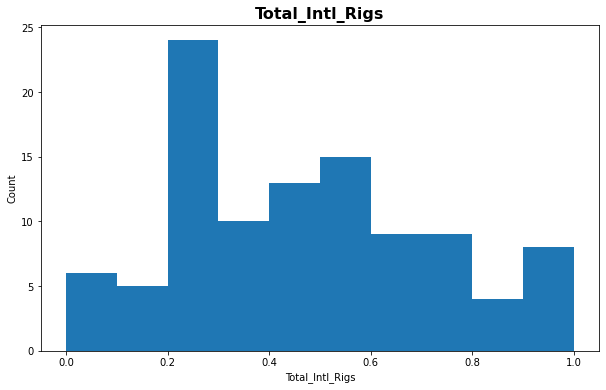

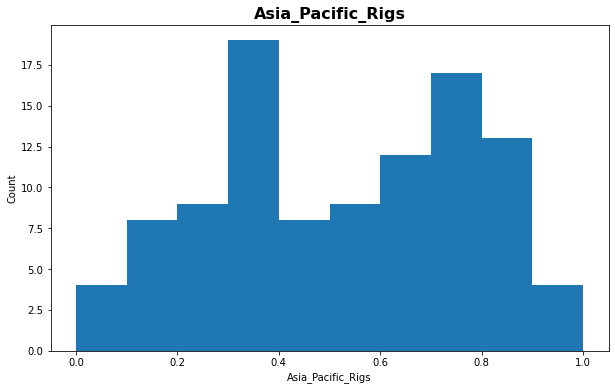

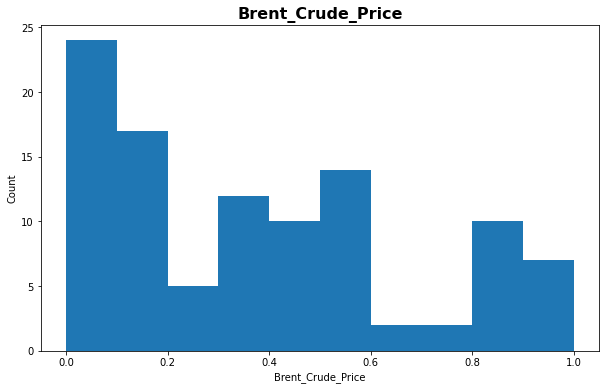

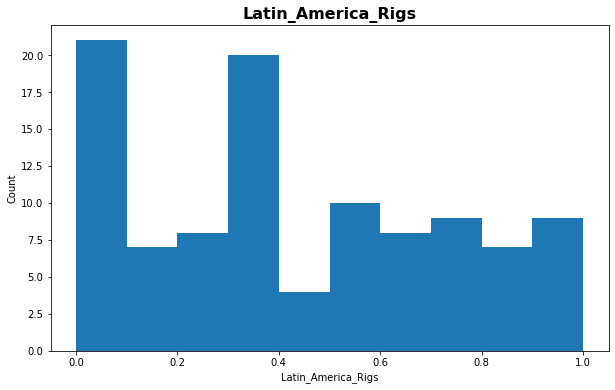

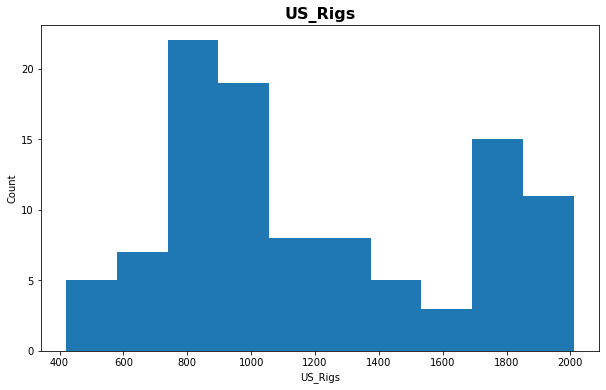

In [12]:
for col in df_scaled.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df_scaled[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

# Correlations

In [13]:
df_scaled.corr()

,Total_Intl_Rigs,Asia_Pacific_Rigs,Brent_Crude_Price,Latin_America_Rigs,US_Rigs
Total_Intl_Rigs,1.000000,0.861696,0.879123,0.720542,0.721919
Asia_Pacific_Rigs,0.861696,1.000000,0.837156,0.741667,0.759682
Brent_Crude_Price,0.879123,0.837156,1.000000,0.730043,0.829238
Latin_America_Rigs,0.720542,0.741667,0.730043,1.000000,0.862802
US_Rigs,0.721919,0.759682,0.829238,0.862802,1.000000


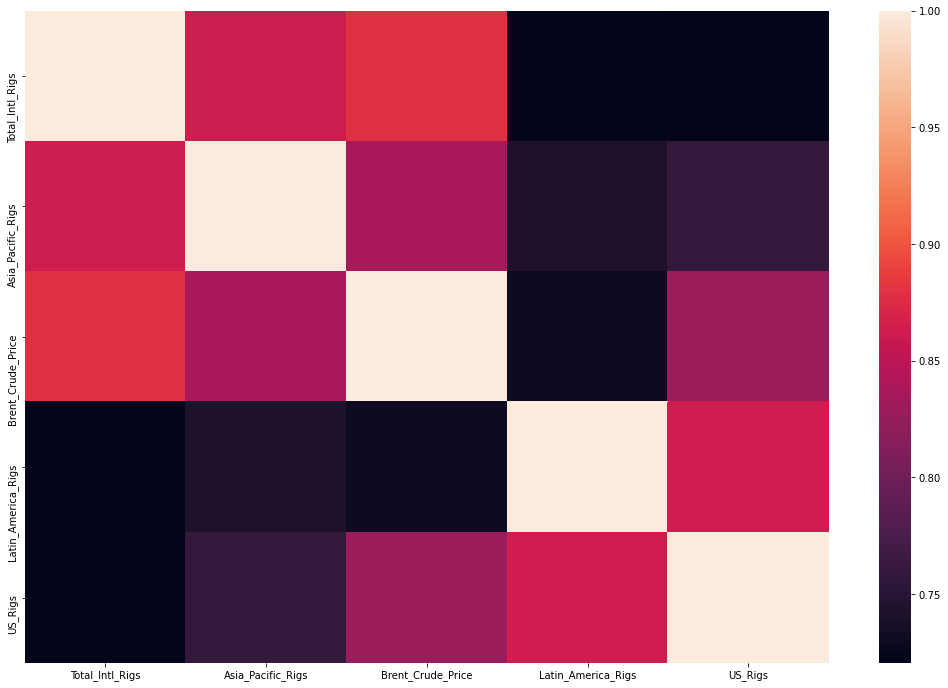

In [14]:
plt.figure(figsize=(18,12))
sns.heatmap(df_scaled.corr())
plt.show()

# Prep for Machine Learning Analysis

In [15]:
#Get Highly Correlated Features
corrs = abs(df_scaled.corr()["US_Rigs"]).sort_values()

predictive_cols = []
for name, col in corrs.iteritems():
    if col > .6 or col < -.6:
        predictive_cols.append(name)
        
predictive_cols

['Total_Intl_Rigs',
 'Asia_Pacific_Rigs',
 'Brent_Crude_Price',
 'Latin_America_Rigs',
 'US_Rigs']

In [16]:
#Create our feature and target sets
feature_cols = ['Total_Intl_Rigs',
 'Asia_Pacific_Rigs',
 'Brent_Crude_Price',
 'Latin_America_Rigs',]

target_col = "US_Rigs"

features = df_scaled[feature_cols]
target = df_scaled[target_col]

In [17]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = features.to_numpy()
y = target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning

In [18]:
#Imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Linear Models

In [19]:
#Initialize Linear Regression Model
reg = LinearRegression()

# fit
reg.fit(X_train, y_train)

# predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.835521847334966
The In Sample MSE: 31722.165409093926

The Out Sample R2 Score: 0.8534614130814273
The Out Sample MSE: 33121.15782079262


In [20]:
#Initialize Ridge Model
ridge = Ridge()

# fit
ridge.fit(X_train, y_train)

# predict
in_preds = ridge.predict(X_train)
out_preds = ridge.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.8106999537075118
The In Sample MSE: 36509.4529768271

The Out Sample R2 Score: 0.8707207961732302
The Out Sample MSE: 29220.132409712533


In [21]:
#Initialize Lasso Model
lasso = Lasso()

# fit
lasso.fit(X_train, y_train)

# predict
in_preds = lasso.predict(X_train)
out_preds = lasso.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.8335897645495558
The In Sample MSE: 32094.797571540832

The Out Sample R2 Score: 0.8690518877907623
The Out Sample MSE: 29597.344849701993


In [22]:
#Initialize ElasticNet Model
en = ElasticNet()

# fit
en.fit(X_train, y_train)

# predict
in_preds = en.predict(X_train)
out_preds = en.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.42527145983442205
The In Sample MSE: 110845.32213581557

The Out Sample R2 Score: 0.44377328594707566
The Out Sample MSE: 125720.28410868238


# Tree Models

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.metrics import mean_squared_error 

Model Evaluation Report
The In Sample R2 Score: 1.0
The In Sample RMSE: 0.0

The Out Sample R2 Score: 0.7470490089403761
The Out Sample MSE: 57172.857142857145


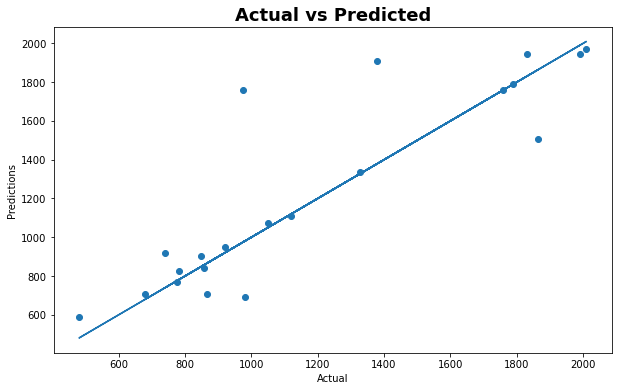

In [24]:
#Initialize Decision Tree Model
dt = DecisionTreeRegressor()

# fit
dt.fit(X_train, y_train)

# predict
in_preds = dt.predict(X_train)
out_preds = dt.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9714453338480108
The In Sample RMSE: 74.21058350167135

The Out Sample R2 Score: 0.8883958101001377
The Out Sample MSE: 25225.164680952377


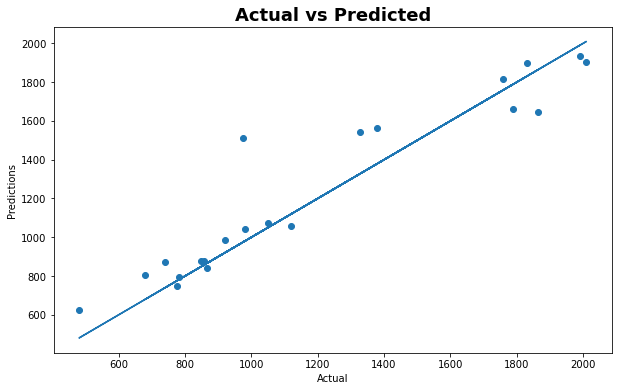

In [25]:
#Initialize Random Forest Model
rf = RandomForestRegressor()

# fit
rf.fit(X_train, y_train)

# predict
in_preds = rf.predict(X_train)
out_preds = rf.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9559283766839399
The In Sample RMSE: 92.19488492928983

The Out Sample R2 Score: 0.8479431039609285
The Out Sample MSE: 34368.42511828283


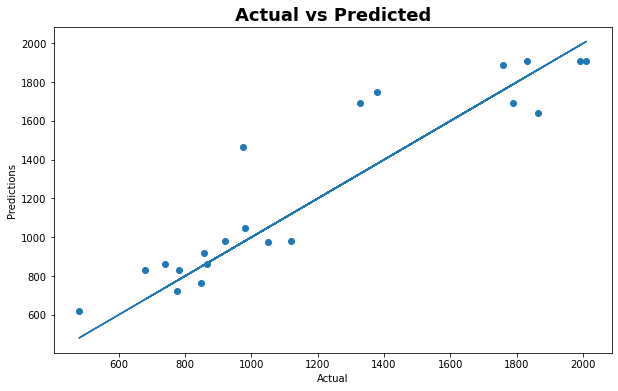

In [26]:
#Initialize Ada Boost Model
ada = AdaBoostRegressor()

# fit
ada.fit(X_train, y_train)

# predict
in_preds = ada.predict(X_train)
out_preds = ada.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9963531841710648
The In Sample RMSE: 26.520653322002005

The Out Sample R2 Score: 0.8783716802709612
The Out Sample MSE: 27490.853146153404


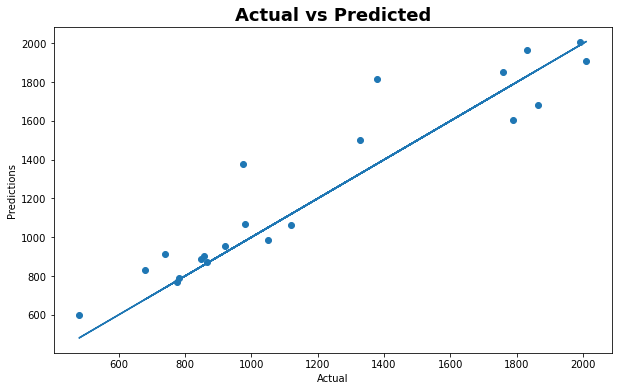

In [27]:
#Initialize Gradient Boost Model
gb = GradientBoostingRegressor()

# fit
gb.fit(X_train, y_train)

# predict
in_preds = gb.predict(X_train)
out_preds = gb.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

# KNN Model

In [28]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('MSE value for k= ' , K , 'is:', error)
    print(f"The Out Sample R2 Score: {r2_score(y_test, pred)}")

MSE value for k=  1 is: 53476.619047619046
The Out Sample R2 Score: 0.7634023475018306
MSE value for k=  2 is: 25967.916666666668
The Out Sample R2 Score: 0.8851096379498028
MSE value for k=  3 is: 26620.211640211648
The Out Sample R2 Score: 0.8822236765291739
MSE value for k=  4 is: 34262.30357142857
The Out Sample R2 Score: 0.8484126195980863
MSE value for k=  5 is: 28779.868571428575
The Out Sample R2 Score: 0.8726686640914518
MSE value for k=  6 is: 28897.84391534391
The Out Sample R2 Score: 0.8721467034679095
MSE value for k=  7 is: 30449.623906705547
The Out Sample R2 Score: 0.865281132874846
MSE value for k=  8 is: 33395.807291666664
The Out Sample R2 Score: 0.8522462760509655
MSE value for k=  9 is: 33276.0152851264
The Out Sample R2 Score: 0.8527762741705219
MSE value for k=  10 is: 33870.350952380955
The Out Sample R2 Score: 0.8501467432433115
MSE value for k=  11 is: 32969.14521841794
The Out Sample R2 Score: 0.8541339654138769
MSE value for k=  12 is: 32407.828703703708
The

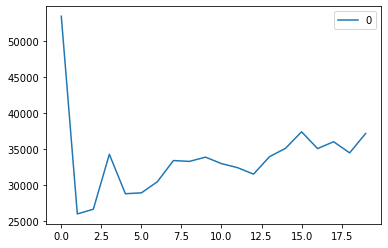

In [29]:
#elbow curve 
curve = pd.DataFrame(rmse_val)
curve.plot()

# SVM Model

Model Evaluation Report
The In Sample R2 Score: -0.030438662289616225
The In Sample RMSE: 445.7982665813619

The Out Sample R2 Score: -0.020033842365799304
The Out Sample MSE: 230551.574066429


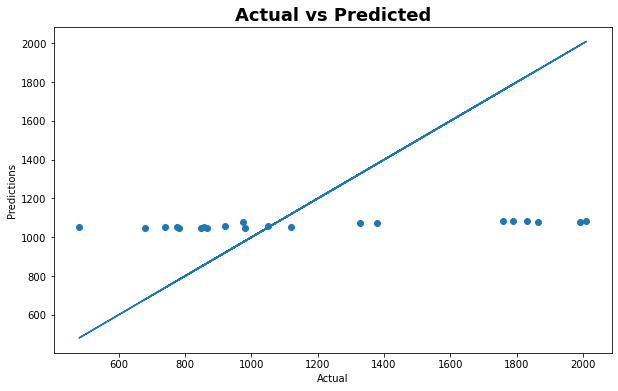

In [30]:
#Initialize SVM Model
from sklearn import svm
svm = svm.SVR()

# fit
svm.fit(X_train, y_train)

# predict
in_preds = svm.predict(X_train)
out_preds = svm.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

# Model Selection

In [31]:
# We chose the Random Forest Model because it had one of the highest combinations of a high r2 score and low MSE score

In [32]:
#Initialize Random Forest Model
rf_final = RandomForestRegressor()

# fit
rf_final.fit(X, y)

# predict
in_preds = rf_final.predict(X)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y, in_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.9761492510125006
The In Sample MSE: 4761.234212621359


# Save Model

In [33]:
import pickle

In [34]:
# save model to disk
filename = 'finalized_model.sav'
pickle.dump(rf_final, open(filename, 'wb'))

In [35]:
saved_x_scaler = 'saved_x_scaler.sav'
pickle.dump(x_scaler, open(saved_x_scaler, 'wb'))

In [36]:
my_new_model = pickle.load(open(filename, 'rb'))

# Test Model

In [37]:
my_new_model.predict(X_test)

array([1973.92,  844.64, 1097.33, 1731.36, 1396.47, 1229.3 ,  864.1 ,
       1824.97,  745.59,  943.45, 1352.88, 1974.33,  727.02,  855.36,
       1013.99, 1072.51,  774.08, 1847.47,  538.99, 1799.13,  786.8 ])

In [38]:
#Prediction
prediction = my_new_model.predict([[.6, .7, .5, .03]])
prediction

array([1092.2])

# Testing User Input Scale Code

In [39]:
#User Input Scaler - Test
user_input = [2000, 300, 70, 350]

In [40]:
user_input_scaled = x_scaler.transform([user_input])
user_input_scaled

array([[1.83269476, 1.15540541, 0.53450314, 0.65891473]])

In [41]:
new_prediction = my_new_model.predict(user_input_scaled)
new_prediction

array([1281.92])